In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
from experiment_params import *

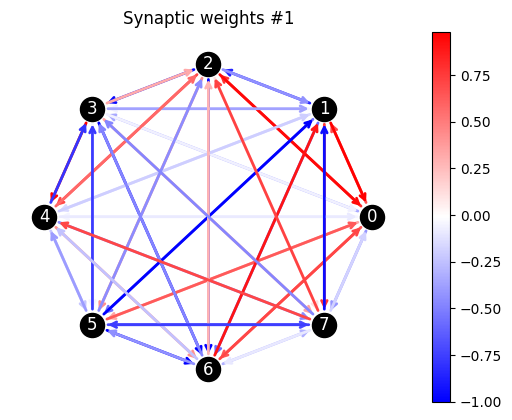

In [2]:
data = synapse_w.copy()

# Create directed graph
G = nx.DiGraph()

# Add nodes
nodes = [i for i in range(num_neurons)]
G.add_nodes_from(nodes)

# Add edges with weights
for i in range(num_neurons):
    for j in range(num_neurons):
        if data[i, j] != 0:
            G.add_edge(i, j, weight=data[i, j])

# Get edge weights for color mapping
edge_weights = nx.get_edge_attributes(G,'weight')
edge_colors = [w / max(abs(min(edge_weights.values())), abs(max(edge_weights.values()))) for w in edge_weights.values()] # Normalized weights

fig, ax = plt.subplots()

# Draw network
pos = nx.circular_layout(G)  # positions for all nodes

nx.draw_networkx_nodes(G, pos, node_color='black', ax=ax)
nx.draw_networkx_labels(G, pos, font_color='white', ax=ax)

edges = nx.draw_networkx_edges(G, pos, node_size=500, arrowstyle='->',
                               arrowsize=10, edge_cmap=plt.cm.bwr, edge_color=edge_colors,
                               width=2, ax=ax)
# Draw edge labels
# edge_labels = nx.get_edge_attributes(G,'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)

# Set colorbar
pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.bwr)
pc.set_array(edge_colors)
fig.colorbar(pc, ax=ax)

plt.axis('off')
plt.title('Synaptic weights #1')
plt.savefig('graph_01.png')
plt.show()

In [ ]:
# Synapse weights
synapse_w = np.random.uniform(-50, 50, (num_neurons, num_neurons))
# set the diagonal to 0 (no self-connection)
synapse_w = synapse_w - np.diag(np.diag(synapse_w))
print(synapse_w)